<a href="https://colab.research.google.com/github/Frankossin/Ciber/blob/thread/C%C3%B3pia_de_M%C3%A9todo_de_Monte_Carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulação de Monte Carlo para Cálculo de Área sob uma Curva

A Simulação de Monte Carlo é uma técnica estatística baseada em números aleatórios. É utilizada para modelar e simular sistemas complexos, testar hipóteses e entender fenômenos variáveis.

No contexto do cálculo de integrais definidas, ou a área sob uma curva, a Simulação de Monte Carlo oferece uma abordagem alternativa à integração numérica tradicional. Este método é especialmente útil quando se lida com funções complexas em domínios multidimensionais. Como, por exemplo, técnicas de aprendizado de máquina.

O processo é relativamente simples:

1. Primeiro, geramos um grande número de pontos aleatórios dentro de uma região que contém a área sob a curva da função.

2. Em seguida, contamos o número de pontos que caem abaixo da curva da função.

3. A proporção de pontos que caem abaixo da curva em relação ao total de pontos gerados é uma estimativa da proporção da área sob a curva em relação à área total da região.

4. Multiplicamos essa proporção pela área total da região para obter uma estimativa da área sob a curva.

No exemplo fornecido, a função é $f(x) = x^2$ e a área de interesse é o intervalo [0, 1]. Primeiro, geramos pontos aleatórios com coordenadas x e y entre $0$ e $1$. Em seguida, verificamos se a coordenada $y$ do ponto está abaixo do valor de $f(x)$. A proporção de pontos que satisfazem essa condição é uma estimativa da integral da função no intervalo $[0, 1]$.

Esse processo é repetido várias vezes para obter uma estimativa mais precisa da integral. Quanto mais pontos forem gerados, mais próxima a estimativa estará do valor verdadeiro.

No código a seguir, vamos um exemplo serial deste cálculo em Python, usando as bibliotecas matplotlib, numpy e sympy.

Valor exato da integral de f(x) = x^2 no intervalo [0, 1]: 1/3
Estimativa da integral de f(x) = x^2 no intervalo [0, 1] usando a Simulação de Monte Carlo: 0.3253


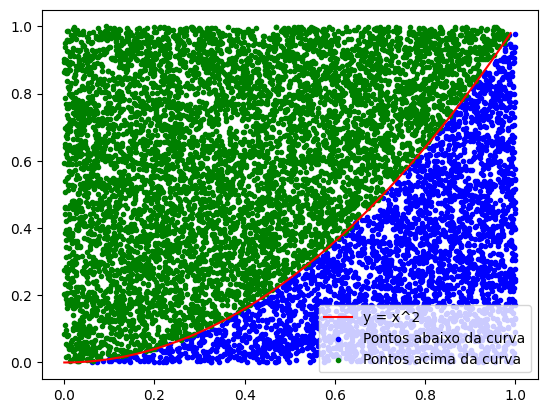

In [ ]:
import matplotlib.pyplot as plt
import random
from sympy import symbols, integrate

# Definir a variável para cálculo simbólico
x = symbols('x')

# Definir a função
f = x**2

# Calcular a integral exata da função no intervalo [0, 1]
exact_integral = integrate(f, (x, 0, 1))
print("Valor exato da integral de f(x) = x^2 no intervalo [0, 1]:", exact_integral)

# Número de pontos aleatórios a serem gerados
N = 10000

# Listas para armazenar os pontos que caem abaixo e acima da curva da função
below_curve_x = []
below_curve_y = []
above_curve_x = []
above_curve_y = []

count = 0
for i in range(N):
    # Gerar um ponto aleatório no intervalo [0, 1]
    x = random.random()

    # Gerar um valor y aleatório entre 0 e o máximo valor que f(x) pode ter no intervalo [0, 1]
    y = random.random()

    # Se o valor y cai abaixo da curva da função no ponto x, incrementar o contador
    if y < x**2:
        count += 1
        below_curve_x.append(x)
        below_curve_y.append(y)
    else:
        above_curve_x.append(x)
        above_curve_y.append(y)

# A estimativa da integral é a proporção de pontos que caíram abaixo da curva da função
integral_estimate = count / N

print("Estimativa da integral de f(x) = x^2 no intervalo [0, 1] usando a Simulação de Monte Carlo:", integral_estimate)

# Gerar o gráfico
fig, ax = plt.subplots()

# Traçar a curva da função
x = [i/100 for i in range(100)]
y = [i**2 for i in x]
ax.plot(x, y, 'r', label='y = x^2')

# Adicionar os pontos que caíram abaixo e acima da curva da função
ax.scatter(below_curve_x, below_curve_y, color='blue', marker='.', label='Pontos abaixo da curva')
ax.scatter(above_curve_x, above_curve_y, color='green', marker='.', label='Pontos acima da curva')

# Adicionar uma legenda
ax.legend()

# Mostrar o gráfico
plt.show()


# Cálculo de Integrais Definidas via Simulação de Monte Carlo

A Simulação de Monte Carlo é uma técnica estatística utilizada para calcular valores que seriam complexos ou impossíveis de se obter analiticamente. Uma das aplicações da Simulação de Monte Carlo é o cálculo de integrais definidas.

Imagine que você tem uma função $f(x)$ contínua em um intervalo $[a, b]$ e você deseja calcular a integral dessa função nesse intervalo. O método de Monte Carlo para calcular essa integral seria gerar um grande número $N$ de pontos aleatórios no gráfico da função no intervalo $[a, b]$ e contar quantos deles caem abaixo da curva da função.Como vimos no exemplo anteriore.

Você pode distribuir o trabalho entre várias threads, onde cada thread é responsável por gerar uma parcela dos pontos aleatórios e contar quantos caem abaixo da curva da função. Cada thread então calcula uma estimativa da integral com base nos pontos que gerou.

**No final, todas as estimativas das threads precisam ser somadas para se obter a estimativa final da integral. No entanto, nenhuma thread pode adicionar sua estimativa à soma final até que todas as threads tenham terminado de gerar seus pontos e contar quantos caem abaixo da curva.**



#Problema proposto para comparação de técnicas de sincronização:

Consideramos um sistema paralelo em Python, onde vários threads estão realizando cálculos independentes que contribuem para um resultado final. Especificamente, cada thread é responsável por realizar um conjunto de cálculos complexos cujo resultado precisa ser somado para se obter uma resposta final. O Método de Monte Carlo para Cálculo de Área sob a curva é ideal para esta análise.

No entanto, é imperativo que todas as threads concluam seus cálculos individuais antes de prosseguir para a etapa de soma. O desafio é garantir que nenhuma thread inicie o processo de soma até que todas as threads tenham concluído seus cálculos individuais.

Este cenário será usado como base para a comparação prática de diferentes técnicas de sincronização em Python: Locks, Semaphores, Conditions e Barriers. Cada técnica será implementada e avaliada com base no tempo necessário para o cálculo da área.

**Você terá que pesquisar o que são Barriers e como usá-las em Python e fazer quatro análises distintas:**
1. **Locks**: Uma maneira de resolver isso é ter um Lock que protege o acesso ao resultado final. Cada thread adquire o lock, atualiza o resultado final e libera o lock. No entanto, as threads precisam esperar que outras threads concluam sem um mecanismo explícito.

2. **Semaphores**: Um semáforo pode ser usado para contar o número de threads que concluíram seu trabalho. Quando uma thread termina, ela decrementa o semáforo. Quando o semáforo atinge zero, o resultado final pode ser calculado.

3. **Conditions**: Uma variável de condição pode ser usada para fazer todas as threads esperarem até que todas as outras threads tenham terminado seu trabalho.

4. **Barriers**: Um Barrier pode ser usado para fazer com que todas as threads esperem até que todas tenham terminado seus cálculos. Uma vez que todas as threads atingem o Barrier, elas podem continuar a calcular o resultado final.

Este trabalho deve ser realizado em Python, no Google Colaboratory, em grupo e o link para o caderno onde seu código pode ser executado deve ser postado no Ambiente Virtual de Aprendizagem (Canvas) no local apropriado.



In [ ]:
import threading
import time
import random

num_threads = 10
N = 10000

# Locks
lock = threading.Lock()
results_lock = [0] * num_threads

def monte_carlo_lock(start, end, N, results, index):
    count = 0
    for _ in range(N):
        x = random.random()
        y = random.random()

        if y < x**2:
            count += 1

    with lock:
        results[index] = count

start_time = time.time()
threads = [threading.Thread(target=monte_carlo_lock, args=(0, 1, N, results_lock, i)) for i in range(num_threads)]
for thread in threads:
    thread.start()
for thread in threads:
    thread.join()

print(f"Locks result: {sum(results_lock) / (N * num_threads)}, Time: {time.time() - start_time} seconds\n")

# Semaphores
semaphore = threading.Semaphore(num_threads)
results_semaphore = [0] * num_threads

def monte_carlo_semaphore(start, end, N, results, index, semaphore):
    count = 0
    for _ in range(N):
        x = random.random()
        y = random.random()

        if y < x**2:
            count += 1

    results[index] = count
    semaphore.acquire()

def sum_semaphore(semaphore, results):
    for _ in range(num_threads):
        semaphore.release()
    print(f"Semaphore result: {sum(results) / (N * num_threads)}")

start_time = time.time()
threads = [threading.Thread(target=monte_carlo_semaphore, args=(0, 1, N, results_semaphore, i, semaphore)) for i in range(num_threads)] + [threading.Thread(target=sum_semaphore, args=(semaphore, results_semaphore))]
for thread in threads:
    thread.start()
for thread in threads:
    thread.join()

print(f"Semaphore Time: {time.time() - start_time} seconds\n")

# Conditions
condition = threading.Condition()
results_condition = [0] * num_threads

def monte_carlo_condition(start, end, N, results, index, condition):
    count = 0
    for _ in range(N):
        x = random.random()
        y = random.random()

        if y < x**2:
            count += 1

    with condition:
        results[index] = count
        condition.notify()

def sum_condition(condition, results):
    with condition:
        condition.wait_for(lambda: all(result != 0 for result in results))
    print(f"Condition result: {sum(results) / (N * num_threads)}")

start_time = time.time()
threads = [threading.Thread(target=monte_carlo_condition, args=(0, 1, N, results_condition, i, condition)) for i in range(num_threads)] + [threading.Thread(target=sum_condition, args=(condition, results_condition))]
for thread in threads:
    thread.start()
for thread in threads:
    thread.join()

print(f"Condition Time: {time.time() - start_time} seconds\n")

# Barriers
barrier = threading.Barrier(num_threads + 1)
results_barrier = [0] * num_threads

def monte_carlo_barrier(start, end, N, results, index, barrier):
    count = 0
    for _ in range(N):
        x = random.random()
        y = random.random()

        if y < x**2:
            count += 1

    results[index] = count
    barrier.wait()

def sum_barrier(barrier, results):
    barrier.wait()
    print(f"Barrier result: {sum(results) / (N * num_threads)}")

start_time = time.time()
threads = [threading.Thread(target=monte_carlo_barrier, args=(0, 1, N, results_barrier, i, barrier)) for i in range(num_threads)] + [threading.Thread(target=sum_barrier, args=(barrier, results_barrier))]
for thread in threads:
    thread.start()
for thread in threads:
    thread.join()

print(f"Barrier Time: {time.time() - start_time} seconds")


Locks result: 0.3343, Time: 0.02057814598083496 seconds

Semaphore result: 0.33377
Semaphore Time: 0.020059585571289062 seconds

Condition result: 0.33476
Condition Time: 0.020226716995239258 seconds

Barrier result: 0.33312
Barrier Time: 0.02080535888671875 seconds
